In [11]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [13]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Prepare the data

In [14]:
from helpers import standardize

def prepare(x):
    """
    Prepare the data by standardizing and replacing unused 
    values (-999) by the mean of their columns such that they
    don't affect the computation then.
    """
    # Here we put the non sense values (-999) to mean 
    # such that then with the standardization they will be set to 0
    xt = np.copy(x.T)
    for xi in xt:
        xi[xi==-999] = np.nan
        m = np.nanmean(xi)
        nanidx = np.where(np.isnan(xi))
        xi[nanidx] = m
        
    tx, mean, std = standardize(xt.T)
    
    return tx

tx = prepare(tX)

In [15]:
to_drop = [12, 16, 19, 21, 26, 29]
to_keep = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 20, 22, 23, 24, 25, 27, 28, 30]
tx_keep = tx[:, to_keep]
tx_drop = tx[:, to_drop]
tx_replace = np.sum(tx_drop, axis=1).reshape((tx.shape[0],1))
tx_keep = np.hstack((tx_keep, tx_replace))

In [16]:
def polynomialBasis(tX, degree = 5):
    tX_poly = np.power(tX, 0)
    
    for d in range(0, degree):
        tX_d = np.power(tX, d+1)
        tX_poly = np.hstack((tX_poly, tX_d))
       
    return tX_poly

tx_poly = concatPolyLog(tx, 5)
print(tx_poly.shape)

NameError: name 'concatPolyLog' is not defined

In [ ]:
def concatPolyLog(tX, degree = 5):
    tX_poly = np.power(tX, 0)
    tX_d = np.log2(np.abs(tX))
    tX_poly = np.hstack((tX_poly, tX_d))
    tX_d = np.log10(np.square(tX))
    tX_poly = np.hstack((tX_poly, tX_d))
    
    for d in range(0, degree):
        tX_d = np.power(tX, d+1)
        tX_poly = np.hstack((tX_poly, tX_d))
       
    return tX_poly
    

In [ ]:
from regression import logistic_regression, ridge_regression

ty = np.copy(y)
ty[ty==-1]=0

# 0.274395483321 -> 10 zeros
# 0.274392472925 -> 9 zeros
# 0.274392480807 -> 8 zeros
lamb = 0.0000000001
weights, loss = ridge_regression(y, tx_poly, 0.0000000001)
weights, loss = logistic_regression(ty, tx_poly, weights, 500, 0.1)

### Exploratory data analysis

In [17]:
rows, features = tx.shape
print('Number of data entries:', rows)
print('Number of feature:', features)
print(tx.shape)
print(tx[:, 1].shape)
print(y.shape)

Number of data entries: 250000
Number of feature: 31
(250000, 31)
(250000,)
(250000,)


[  3.14910656e-01   7.40827026e-01  -9.69035940e-13 ...,  -3.10930673e-01
  -5.10097335e-01  -9.69035940e-13]


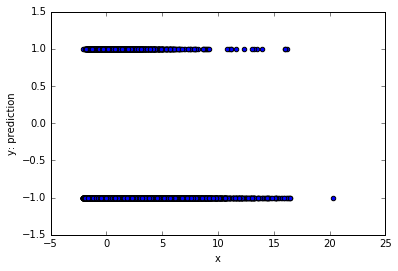

In [293]:
plt.rcParams['agg.path.chunksize'] = 10000
feature1 = tx[:, 1]
print(feature1)
plt.scatter(feature1, y)
plt.xlabel('x')
plt.ylabel('y: prediction')
plt.show()

In [243]:
for f in range(0, 0):
    featureData = tx[:, f]
    plt.scatter(featureData, y)
    plt.xlabel('x')
    plt.ylabel('y: prediction')
    plt.show()

### Exploratory data comments

For feature : 

    4-  > 40 =>  1
    5-  > 6  =>  1
    
    1-  > 20 => -1 [10,20] => more likely to be -1
    3-  > 20 => -1
    21- > 10 => -1
    26- > 22 => -1
    29- > 13 => -1
    

## Process the Machine Learning

#### Differents learning methods

In [244]:
from least_squares import *
from regression import *

def learn_with(method, y, tx, gamma=0.05, max_iters=10, lambda_=0.1):
    
    initial_w, loss = least_squares(y, tx)
    #initial_w = np.zeros((tx.shape[1]))
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, initial_w, max_iters, gamma)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, initial_w, max_iters, gamma)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, initial_w, max_iters, gamma)

    if method == 'reg_logistic_regression': 
        return reg_logisitic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    if method == 'ridge_regression': 
        return ridge_regression(y, tx, lambda_)
    
    return initial_w, loss

#### Training phase

In [245]:
def compare_least_squares(y, tx):
    w3, l3 = learn_with("least_square", y, tx)
    w2, l2 = learn_with("least_square_GD", y, tx, 0.15, 50)
    w1, l1 = learn_with("least_square_SGD", y, tx, 0.5, 50)
    print("SGD")
    print(l1)
    print(w1)
    print("GD")
    print(l2)
    print(w2)
    print("--")
    print(l3)
    print(w3)
    

In [246]:
def compare_regression(y, tx):
    w1, l1 = learn_with('logistic_regression', y, tx, 0.05, 5000, 0.1)
    print("Log reg")
    print(l1)
    print(w1)
    #print(compute_loss(y, tx, w1))
    #w2, l2 = learn_with('reg_logistic_regression', y, tx, 0.8, 200, 0.1)
    #print("Reg Log reg")
    #print(l2)
    #print(w2)
    #print(compute_loss(y, tx, w2))
    #w3, l3 = learn_with("ridge_regression", y, tx)
    #print("Ridge reg")
    #print(calculate_nll(y, tx, w3))
    #print(l3)
    #print(w3)
    
    """
    Log reg 0.8, 500, 0.1
-4671153.01861
[ -2.25295698e+07  -3.06427418e+05  -1.03730279e+07  -5.34256123e+05
   2.90765576e+06   1.72703101e+06   1.82283493e+06  -1.32060151e+06
   3.70994715e+06  -9.73801235e+05   1.16426102e+06  -4.68381621e+06
   6.12572840e+06   2.22132684e+06   3.90702697e+06  -4.46967461e+04
  -1.14144114e+05  -5.57109974e+05   8.94959924e+03   5.50470802e+04
  -1.41639994e+06   1.09023457e+05   7.89179827e+05   9.96625294e+05
   2.50540905e+04   1.34434906e+04   1.01247820e+04  -1.07591308e+06
   2.83248412e+04  -4.08580829e+04   6.06435081e+05]
    """

In [61]:
ty = np.copy(y)
ty[ty==-1]=0

initial_w, l = least_squares(y, tx)

weights, loss = reg_logisitic_regression(y, tx, 0.8, initial_w, 5000, 0.01)
print(calculate_nll(y, tx, initial_w))

#compare_regression(ty, tx)
#compare_regression(y, tx)

Iter 0 loss = -0.227624051753


KeyboardInterrupt: 

In [249]:
print(weights)
print(loss)

"""
Logistic regression, Newton 0.01 5000 iterations
[ -1.66501702e+02   9.68127486e-01  -5.36448131e+01  -5.37504843e+01
   1.55559176e+00   6.58218693e+00   1.14284574e+01   2.20142554e+00
   5.94642630e+01  -5.02893460e+00  -6.37469684e+04  -4.27646582e+01
   2.62184496e+01   1.54501909e+01   1.23811610e+04  -1.24339164e-01
  -1.64544571e-01   1.22171962e+04  -2.09028647e-01   4.77671248e-01
   1.90759710e+01   1.62105136e-01  -9.73034777e+00   4.82998380e+00
  -1.15688997e+01   5.72081599e-02   5.55350060e-02  -6.06852955e+00
   2.84958258e-01  -3.49277890e-01   5.40049887e+04]
-95.5599118311
"""

[ -1.85053048e-02   1.76729286e-01  -2.77122433e-01  -2.95985164e-01
   6.96419297e-02   7.27657716e-02  -1.57796586e-01  -1.23658438e-01
   1.96816729e-01  -2.28034949e-02  -1.25132254e+01  -8.10944906e-02
  -1.88124734e-01   1.09861860e-01   2.75940636e+00  -1.45604799e-03
  -3.58140946e-03   2.54988134e+00   3.25108043e-03   4.32725459e-03
  -2.20097892e-02  -2.88115647e-03  -2.04908364e-02  -9.74967792e-02
   1.25463201e-01  -6.02766756e-03  -5.87862693e-03   9.93898888e-02
  -2.34323123e-03  -6.77154647e-06   1.05475923e+01  -2.57379015e-02
  -1.43281198e-01   4.81631427e-03  -1.46785560e-02   7.87194796e-02
   3.11974855e-02   8.61018724e-02  -3.43033330e-04  -5.73524014e-02
   1.29037025e-02   3.39038355e-02   5.97639772e-02  -6.22320440e-02
   1.77785787e-02  -1.13586122e-01  -2.61082590e-02  -8.15467747e-03
  -5.29990617e-02  -6.39381778e-02  -2.47725765e-03   3.81477189e-02
   5.58342021e-03  -7.20225475e-02  -1.17752763e-01  -6.23472043e-02
   1.05213326e-01   4.44462388e-03

'\nLogistic regression, Newton 0.01 5000 iterations\n[ -1.66501702e+02   9.68127486e-01  -5.36448131e+01  -5.37504843e+01\n   1.55559176e+00   6.58218693e+00   1.14284574e+01   2.20142554e+00\n   5.94642630e+01  -5.02893460e+00  -6.37469684e+04  -4.27646582e+01\n   2.62184496e+01   1.54501909e+01   1.23811610e+04  -1.24339164e-01\n  -1.64544571e-01   1.22171962e+04  -2.09028647e-01   4.77671248e-01\n   1.90759710e+01   1.62105136e-01  -9.73034777e+00   4.82998380e+00\n  -1.15688997e+01   5.72081599e-02   5.55350060e-02  -6.06852955e+00\n   2.84958258e-01  -3.49277890e-01   5.40049887e+04]\n-95.5599118311\n'

In [37]:
def train(y, tx):
    
    w, loss = learn_with("least_square_GD", y, tx)
    
    return w, loss

#loss, weights = train(y, tx)
#compare_least_squares(y, tx)
#compare_regression(y, tx)
#w, l = least_squares(y, tx)
#print(calculate_nll(y, tx, w))

from cross_validation import cross_validation_demo

initial_w = np.zeros((tx.shape[1]))
gamma = 0.05


cross_validation_demo(ty, tx, initial_w, gamma)

Step 1 over 30 gamma = 0.0001
[ -2.94160000e+00   8.94171500e-02  -3.12474833e+00  -1.26178444e-01
   1.72769413e+00   1.63393549e+00   1.58157589e+00  -1.46163863e+00
   1.01150702e-01  -1.40688283e-01   1.36930717e+00  -1.72420015e+00
   2.40709536e+00   1.54762343e+00   2.09535200e+00  -1.42612694e-02
  -5.36487247e-02  -2.70502132e-01   2.20697795e-03   5.59096148e-02
   2.11493190e-01   6.08401800e-02   1.20335856e+00   1.18520080e+00
   7.91793508e-01  -2.44142003e-03  -1.36061600e-02  -1.16010886e-01
   1.74606712e-02  -4.38855905e-02   1.19822320e+00]
[-5.64249293 -0.0680478  -4.85301709  0.15554238  0.18275511  1.39977141
  1.43170439 -1.14791026  2.54357679 -1.0310491  -0.57332634 -3.00347423
  2.26216867  1.32107537  2.31967829 -0.03444307 -0.11506415 -1.18415099
  0.00898331  0.08929838 -1.87428655  0.06024112 -0.57588256 -0.36358059
 -1.04470254 -0.0185535  -0.00979826 -1.14474646  0.03848551 -0.03472227
 -0.94064513]
[ -8.48498954e+00  -3.23704620e-01  -5.57901247e+00  -1

KeyboardInterrupt: 

Maybie a problem with loss computation ? To what should we go ? Here loss is going to inf or -inf depending on the lambdas and gamma..

## Generate predictions and save ouput in csv format for submission:

In [64]:
weights, loss = learn_with('logistic_regression', y, tx, 0.1, 5000, 0.1)
print(weights)

22816.6979694
[ -1.84999059e+04   1.73807869e+02  -6.40556665e+03  -2.91268919e+02
   3.49692341e+03   3.36336077e+03   3.25516066e+03  -3.01517764e+03
   2.24684633e+02  -2.89640943e+02   2.44145192e+03  -3.57819574e+03
   4.92363652e+03   3.15599209e+03   4.34657714e+03  -1.77738175e+01
  -7.97107814e+01  -5.36324839e+02   2.72227438e+01   7.50435994e+01
   3.93070885e+02   1.35323788e+02   2.45104322e+03   2.40904632e+03
   1.59244499e+03   3.96885189e+00  -3.50478753e+00  -2.39432539e+02
   1.28506298e+01  -6.38126885e+01   2.70543226e+03]
[ -3.14664000e-01   9.63458000e-03  -2.54719228e-01  -2.63502968e-01
  -1.10181138e-03   2.18423831e-02   9.00537818e-02   4.83490552e-03
   2.82008766e-01  -2.81502578e-02  -3.29277403e+02  -1.88141151e-01
   1.18065030e-01   7.66172591e-02   6.39659203e+01  -7.79460481e-04
  -8.30656821e-04   6.30817546e+01  -8.61168784e-04   2.51791346e-03
   1.03659311e-01   9.33786079e-04  -4.70019027e-02   4.17575954e-02
  -4.75783459e-02   6.50726388e-04  

In [19]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


tx_Test_norm = prepare(tX_test)


## Try prediction with false true answers

Step -1 over 8
Step 0 over 8
Step 1 over 8
Step 2 over 8
Step 3 over 8
Step 4 over 8
Step 5 over 8
Step 6 over 8


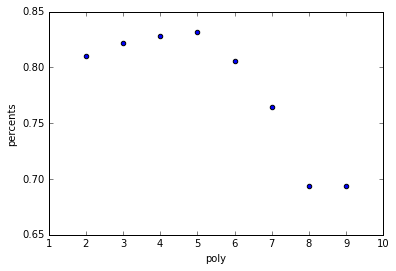

In [271]:
ranges = range(2, 10)
percents = []

for poly in ranges:
    # Train :
    tx_poly = polynomialBasis(tx, poly)
    lamb = 0.0000000001
    weights, l = ridge_regression(y, tx_poly, 0.0000000001)
    
    # Test :
    tx_test_poly = polynomialBasis(tx_Test_norm, poly)
    y_pred = predict_labels(weights, tx_test_poly)
    
    # Compare :
    N = yb.shape[0]
    same = 0
    for i in range (N):
        if y_pred[i]==yb[i]:
            same = same+1

    percents.append(same / N)
    
    print("Step", poly-3, "over", len(ranges))

plt.scatter(ranges, percents)
plt.xlabel('poly')
plt.ylabel('percents')

In [281]:
max(percents)

0.8315763636363637

In [22]:
#weights = [-1.66501702e+02, 9.68127486e-01, -5.36448131e+01, -5.37504843e+01, 1.55559176e+00,   6.58218693e+00,   1.14284574e+01,  2.20142554e+00, 5.94642630e+01,  -5.02893460e+00,  -6.37469684e+04,  -4.27646582e+01, 2.62184496e+01,   1.54501909e+01,   1.23811610e+04,  -1.24339164e-01, -1.64544571e-01,   1.22171962e+04,  -2.09028647e-01,   4.77671248e-01, 1.90759710e+01,   1.62105136e-01,  -9.73034777e+00,   4.82998380e+00, -1.15688997e+01,   5.72081599e-02,   5.55350060e-02,  -6.06852955e+00, 2.84958258e-01,  -3.49277890e-01,   5.40049887e+04]
#weights = np.array(weights)
weights, loss = ridge_regression(y, tx, 0.0000000001)
weights, loss = logistic_regression(ty, tx, weights, 500, 0.1)

print(weights)

[ -9.01742125e-01   9.99474206e-02  -6.75996910e-01  -1.21988248e+00
   3.62758919e-01  -4.96054263e-02   4.32874503e-01   4.44545723e-02
   1.12723532e+00  -9.33177186e-02  -4.18054146e+02  -8.13874576e-01
   2.36310512e-01   2.22665576e-01   8.14989904e+01  -2.53447956e-03
  -1.61015277e-03   8.08033849e+01  -2.48717945e-03   6.97434698e-03
   1.21840438e-01   1.05475882e-04  -1.36658914e-01   1.76772765e-01
  -1.32833943e-01   7.92558928e-04  -9.71975310e-04  -1.46390605e-01
   5.99658908e-03  -4.26121572e-03   3.54032306e+02]


In [251]:
tx_test_poly = polynomialBasis(tx_Test_norm, 5)

In [380]:
OUTPUT_PATH = '../output/out.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_test_poly)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)